In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(0.0, 1.0)

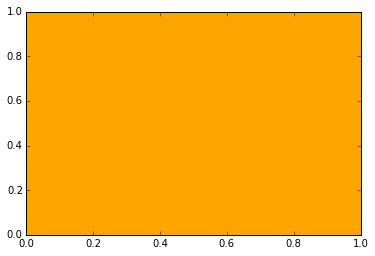

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
polygon = matplotlib.patches.Polygon(np.array([[1.0, 1.0],[1.0, -1.0],[-1.0, -1.0],[-1.0, 1.0]]),
                                     facecolor='orange')
ax.add_patch(polygon)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,1.0)

In [164]:
def plot_a(ax, base, left_edge, height, color):
    a_polygon_coords = [
        np.array([
           [0.0, 0.0],
           [0.5, 1.0],
           [0.5, 0.9],
           [0.1, 0.0],
        ]),
        np.array([
           [1.0, 0.0],
           [0.5, 1.0],
           [0.5, 0.9],
           [0.9, 0.0],
        ]),
        np.array([
           [0.225, 0.45],
           [0.775, 0.45],
           [0.825, 0.35],
           [0.175, 0.35],
        ])
    ]
    for polygon_coords in a_polygon_coords:
        ax.add_patch(matplotlib.patches.Polygon((np.array([1,height])[None,:]*polygon_coords
                                                 + np.array([left_edge,base])[None,:]),
                                                facecolor=color, edgecolor=color))

In [165]:
def plot_c(ax, base, left_edge, height, color):
    ax.add_patch(matplotlib.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=1.3, height=height,
                                            facecolor=color, edgecolor=color))
    ax.add_patch(matplotlib.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
                                            facecolor='white', edgecolor='white'))
    ax.add_patch(matplotlib.patches.Rectangle(xy=[left_edge+1, base], width=1.0, height=height,
                                            facecolor='white', edgecolor='white', fill=True))

In [166]:
def plot_g(ax, base, left_edge, height, color):
    ax.add_patch(matplotlib.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=1.3, height=height,
                                            facecolor=color, edgecolor=color))
    ax.add_patch(matplotlib.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
                                            facecolor='white', edgecolor='white'))
    ax.add_patch(matplotlib.patches.Rectangle(xy=[left_edge+1, base], width=1.0, height=height,
                                            facecolor='white', edgecolor='white', fill=True))
    ax.add_patch(matplotlib.patches.Rectangle(xy=[left_edge+0.825, base+0.085*height], width=0.174, height=0.415*height,
                                            facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(matplotlib.patches.Rectangle(xy=[left_edge+0.625, base+0.35*height], width=0.374, height=0.15*height,
                                            facecolor=color, edgecolor=color, fill=True))

In [167]:
def plot_t(ax, base, left_edge, height, color):
    ax.add_patch(matplotlib.patches.Rectangle(xy=[left_edge+0.375, base],
                  width=0.25, height=height, facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(matplotlib.patches.Rectangle(xy=[left_edge, base+0.75*height],
                  width=1.0, height=0.25*height, facecolor=color, edgecolor=color, fill=True))

(0.0, 2.0)

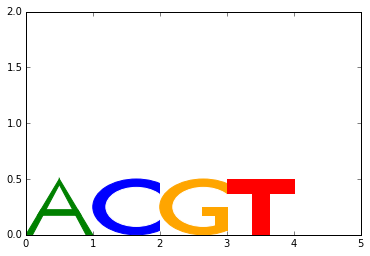

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_a(ax, base=0.0, left_edge=0.0, height=0.50, color='green')
plot_c(ax, base=0.0, left_edge=1.0, height=0.50, color='blue')
plot_g(ax, base=0.0, left_edge=2.0, height=0.50, color='orange')
plot_t(ax, base=0.0, left_edge=3.0, height=0.50, color='red')
ax.set_xlim(0.0,5.0)
ax.set_ylim(0.0,2.0)

In [184]:
def plot_weights(ax, array,
                 colors={0:'green', 1:'blue', 2:'orange', 3:'red'},
                 plot_funcs={0:plot_a, 1:plot_c, 2:plot_g, 3:plot_t},
                 height_padding_factor=1.2,
                 length_padding=1.0,
                 subticks_frequency=1.0):
    if len(array.shape)==3:
        array = np.squeeze(array)
    assert len(array.shape)==2, array.shape
    assert array.shape[0]==4
    max_pos_height = 0.0
    min_neg_height = 0.0
    for i in range(array.shape[1]):
        #sort from smallest to highest magnitude
        acgt_vals = sorted(enumerate(array[:,i]), key=lambda x: abs(x[1]))
        positive_height_so_far = 0.0
        negative_height_so_far = 0.0
        for letter in acgt_vals:
            plot_func = plot_funcs[letter[0]]
            color=colors[letter[0]]
            if (letter[1] > 0):
                height_so_far = positive_height_so_far
                positive_height_so_far += letter[1]                
            else:
                height_so_far = negative_height_so_far
                negative_height_so_far += letter[1]
            plot_func(ax=ax, base=height_so_far, left_edge=i, height=letter[1], color=color)
        max_pos_height = max(max_pos_height, positive_height_so_far)
        min_neg_height = min(min_neg_height, negative_height_so_far)
    ax.set_xlim(-length_padding, array.shape[1]+length_padding)
    ax.xaxis.set_ticks(np.arange(0.0, array.shape[1]+1, subticks_frequency))
    ax.set_ylim(min_neg_height*height_padding_factor,max_pos_height*height_padding_factor)
            

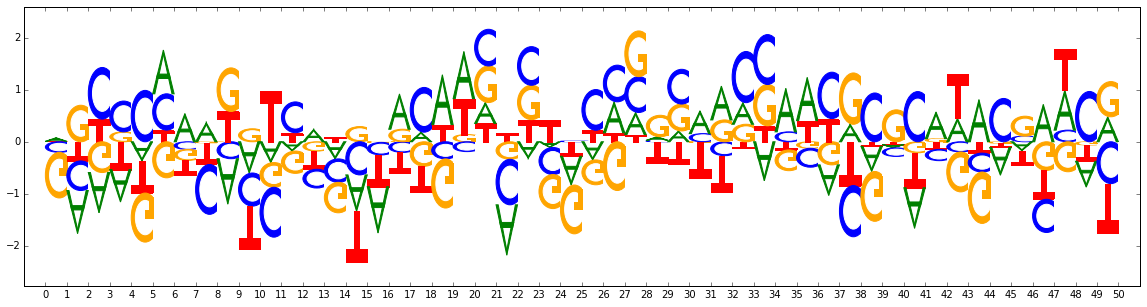

In [190]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plot_weights(ax, 2*(np.random.random((4,50))-0.5))